# [Optimize the Products Price for an Online Vendor](https://www.analyticsvidhya.com/blog/2016/07/solving-case-study-optimize-products-price-online-vendor-level-hard/)

Suppose, you are the owner of an online grocery store. You sell 250 products online. A conventional methodology has been applied to determine the price of each product. And, the methodology is very simple – price the product at par with the market price of the product.

You plan to leverage analytics to determine pricing to maximize the revenue earned.

Out of 100000 people who visit your website, only 5000 end up purchasing your products. Now, all those who made a purchase, you have obtained their buying patterns, including their average unit purchased etc.

To understand the impact of price variations, you tried testing different price points for each product. You got astonished by the results. The impact can be broken down into two aspects:

    A lower price point increases the volume of the purchased product.
    
    Customers compare price points of a few products more than others, to make a decision whether to buy products from your portal or not.

For instance, Product 1 might be a frequently used product. If you decrease the price point of product 1, then the customer response rate which was initially 5% goes up to 5.2% over and above the fact that the customer will purchase more of product 1. On the other hand, decrease in product price obviously decreases the margin of the product.

**Note: The maximum price hike permitted is 20%. So, basically the price of a product can be varied between -10% to +20% around the average price/unit.**

Now, you want to find the optimum price points for each of the product to maximize the total profit earned. In this case study, you are provided with a table with all 250 items

The variables available in the data set:

| Field | Description |
| --- | --- |
|Average Price/Unit|Market price of the product|
|Cost/Unit|Current cost of the product|
|Average Profit/Unit|Profit for each unit|
|Average units sold|Average number of units of product sold to a customer who makes a purchase|
|Incremental acquisition|For every 10% decline in unit price, this is the increase in total customer response rate. Note that overall response rate initially is 5% (5000 out of 100000 make a purchase). You are allowed to decrease the price of a product maximum by 10% by market laws.|
|Increase in sale volume|For every 10% decline in unit price of product, this is the increase in volume. Again, you are allowed to decrease the price of a product maximum by 10% by market laws.|


In [23]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Env vars
data_path = os.path.join(os.path.abspath('../data'))

### ETL

In [19]:
# Download and save data
data_url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/07/Vendor_Data.csv'
r = requests.get(data_url, allow_redirects=True)
open(os.path.join(data_path,'Vendor_Data.csv'), 'wb').write(r.content)

# load data
df = pd.read_csv(os.path.join(data_path,'Vendor_Data.csv'))
df[:1]

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906


### EDA

***Profit Margin % per product***

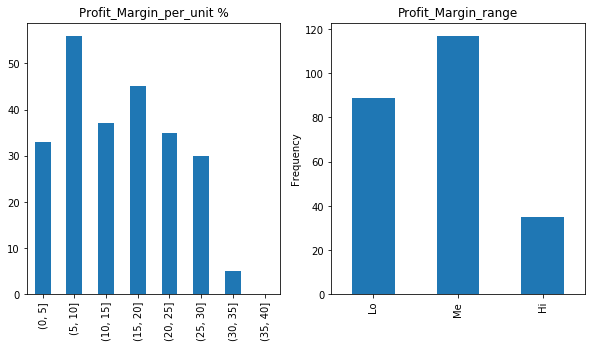

In [68]:
#calculate fields
df['Profit_Margin_per_unit'] = (1-(df['Cost_per_unit']/df['Avg_Price_per_unit']))*100.0
df['Profit_Margin_range'] = pd.cut(df['Profit_Margin_per_unit'],bins=[0,10,25,100],labels=['Lo','Me','Hi'])

#plot
fig,axs=plt.subplots(1,2,figsize=(10,5))
pd.cut(df['Profit_Margin_per_unit'],bins=np.arange(0,45,5)).value_counts().sort_index().plot.bar(title='Profit_Margin_per_unit %',ax=axs[0])
df['Profit_Margin_range'].value_counts().sort_index().plot.bar(title='Profit_Margin_range',ax=axs[1])
plt.ylabel('Frequency');

***Product Incremental Sales Volume***


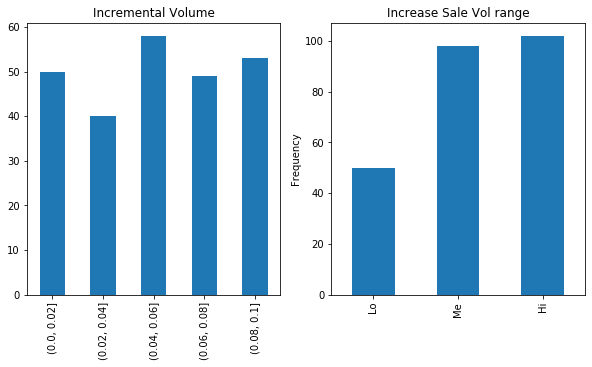

In [70]:
# calc field
df['Increase_sale_volume_range'] = pd.cut(df['Increase_sale_volume'],bins=[0,.02,.06,1],labels=['Lo','Me','Hi'])

#plot
fig,axs=plt.subplots(1,2,figsize=(10,5))
pd.cut(df['Increase_sale_volume'],bins=np.arange(0,0.12,.02)).value_counts().sort_index().plot.bar(title='Incremental Volume',ax=axs[0])
df['Increase_sale_volume_range'].value_counts().sort_index().plot.bar(title='Increase Sale Vol range',ax=axs[1])
plt.ylabel('Frequency');

***Incremental Aquisition***

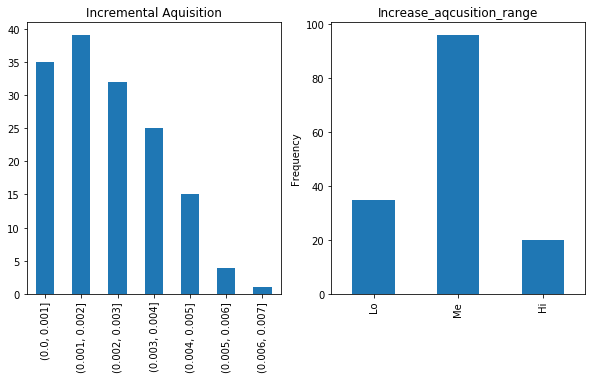

In [73]:
# calc field
df['Increase_aqcusition_range'] = pd.cut(df['Incremental_acquisition'],bins=[0,.001,.004,1],labels=['Lo','Me','Hi'])

#plot
fig,axs=plt.subplots(1,2,figsize=(10,5))
pd.cut(df['Incremental_acquisition'],bins=np.arange(0,0.008,.001)).value_counts().sort_index().plot.bar(title='Incremental Aquisition',ax=axs[0])
df['Increase_aqcusition_range'].value_counts().sort_index().plot.bar(title='Increase_aqcusition_range',ax=axs[1])
plt.ylabel('Frequency');